## Libraries

In [65]:
import copy

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
#!pip install seaborn #to directly install a library from a python script
import seaborn as sns


from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import MinMaxScaler

## Data Loading and Storage

In [26]:
def load_data():
    #Either use numpy to get the csv as a numpy array
    #features_with_label_with_column_names = np.genfromtxt("../Data/newdata_hardness_as_target_csv_only_simulation_data.csv", delimiter=",")
    
    #Or use pandas to get a pandas data frame
    features_with_label_with_column_names = pd.read_csv("../Data/newdata_hardness_as_target_csv_only_simulation_data.csv")
    return features_with_label_with_column_names

In [27]:
original_data = load_data()
#create a copy of the original data features and labels
copy_of_original_data = copy.deepcopy(original_data)

## Train-Test split
In any machine learning problem, the data set should be split into training, validation, and testing set before any feature engineering, visualization, or analysis is made. This is done in order to maintain the validity of the test and validation data i.e., the training should not be influenced by any information from the validaiton or the test data. If this happens, this is a classic case of data leakage.

In [28]:
np.random.seed(42)
shuffled_data_indices = np.random.permutation(len(original_data))
test_split_size = 0.10
validation_split_size = 0.20

total_test_data = int(test_split_size * len(original_data))
total_validation_data = int(validation_split_size * len(original_data))

testing_indices = shuffled_data_indices[:total_test_data]
validation_indices = shuffled_data_indices[total_test_data:total_test_data+total_validation_data]
training_indices = shuffled_data_indices[total_test_data+total_validation_data:]

print(f"The length of the original data set is: {len(original_data)}")
print(f"After the split, the training data, validation data, and the testing data have lengths of: {len(training_indices)}, {len(validation_indices)}, and {len(testing_indices)}")

training_data = original_data.iloc[training_indices]
validation_data = original_data.iloc[validation_indices]
test_data = original_data.iloc[testing_indices]

The length of the original data set is: 127
After the split, the training data, validation data, and the testing data have lengths of: 90, 25, and 12


## Visualization

In [29]:
original_data.head()

,% of Cr,% of Hf,% of Mo,% of Nb,% of Ta,% of Ti,% of Re,% of V,% of W,% of Zr,...,% of Al,% of Mn,%Cu,%C,Entropy,bulk Modulus,shear Modulus,Valence,Melting Point,Hardness
0,25.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.526344,132.500,87.000,4.250,1598.750,116.0
1,20.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,13.381672,121.200,74.800,4.000,1411.000,484.0
2,20.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,20.0,0.0,0.0,13.381672,128.800,85.000,4.200,1528.200,144.0
3,17.0,0.0,0.0,0.0,0.0,0.0,0,17.0,0.0,0.0,...,0.0,16.1,0.0,0.0,14.894903,133.654,78.731,4.338,1596.297,650.0
4,20.0,0.0,0.0,0.0,0.0,0.0,0,4.6,0.0,0.0,...,0.0,17.0,0.0,0.0,14.304631,129.900,83.619,4.250,1554.788,151.0


In [30]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 23 columns):
% of Cr          127 non-null float64
% of Hf          127 non-null float64
% of Mo          127 non-null float64
% of Nb          127 non-null float64
% of Ta          127 non-null float64
% of Ti          127 non-null float64
% of Re          127 non-null int64
% of V           127 non-null float64
% of W           127 non-null float64
% of Zr          127 non-null float64
% of Co          127 non-null float64
% of Ni          127 non-null float64
%Fe              127 non-null float64
% of Al          127 non-null float64
% of Mn          127 non-null float64
%Cu              127 non-null float64
%C               127 non-null float64
Entropy          127 non-null float64
bulk Modulus     127 non-null float64
shear Modulus    127 non-null float64
Valence          127 non-null float64
Melting Point    127 non-null float64
Hardness         127 non-null float64
dtypes: float64(22), in

In [31]:
original_data.describe()

,% of Cr,% of Hf,% of Mo,% of Nb,% of Ta,% of Ti,% of Re,% of V,% of W,% of Zr,...,% of Al,% of Mn,%Cu,%C,Entropy,bulk Modulus,shear Modulus,Valence,Melting Point,Hardness
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.0,127.000000,127.000000,127.000000,...,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.889370,1.266142,16.480945,15.062205,12.764567,3.588189,0.0,14.249764,11.289764,2.485827,...,2.474803,0.685039,0.361417,0.240157,12.815952,185.715108,81.831104,4.975071,2323.873613,528.901969
std,8.298023,4.640252,12.268527,11.338766,10.980419,8.014982,0.0,11.488385,11.384498,6.709869,...,6.930139,3.410327,2.366836,1.193710,0.920047,37.760653,17.592848,0.581394,479.792869,196.230863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.081881,96.220000,38.400000,3.466000,1155.419000,116.000000
25%,0.000000,0.000000,6.215000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,12.309516,151.293800,74.450600,4.400000,1904.894700,383.850000
50%,0.000000,0.000000,20.000000,19.000000,10.000000,0.000000,0.0,11.400000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,12.771167,198.000000,85.100000,5.300000,2538.600000,520.000000
75%,0.000000,0.000000,24.300000,20.000000,20.000000,0.000000,0.0,20.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.318558,217.000000,93.250000,5.400000,2706.800000,677.300000
max,31.800000,20.000000,40.000000,50.000000,40.000000,27.900000,0.0,50.000000,30.000000,26.200000,...,41.100000,20.000000,17.700000,6.500000,14.897551,244.000000,114.100000,6.100000,3023.400000,983.910000


In [32]:
#Not printing the bins since there are too many features
# data.hist(bins = 50, figsize = (20,15))

Separate features and labels before any feature engineering/ preprocessing is done on the training data.

In [33]:
num_features = len(training_data.iloc[0]) - 1 # subtracting one because the data still contains the label column
raw_training_features, raw_training_labels = training_data.iloc[:,0:num_features], training_data.iloc[:,num_features]
raw_validation_features, raw_validation_labels = validation_data.iloc[:,0:num_features], validation_data.iloc[:,num_features]
raw_testing_features, raw_testing_labels = test_data.iloc[:,0:num_features], test_data.iloc[:,num_features]
#since the labels consist of a single column, pandas creates raw_labels variable as a pandas series, convert into df
raw_training_labels = pd.DataFrame(raw_training_labels)

# Feature Selection/ Extraction

## Check Missing Values

In [34]:
features_description = raw_training_features.describe()
transposed_description = features_description.T
#add a new column that shows what percent of the samples are missing each features
transposed_description["missing_percent"] = 1 - (transposed_description["count"]/len(raw_training_features))

transposed_description["missing_percent"]

% of Cr          0.0
% of Hf          0.0
% of Mo          0.0
% of Nb          0.0
% of Ta          0.0
% of Ti          0.0
% of Re          0.0
% of V           0.0
% of W           0.0
% of Zr          0.0
% of Co          0.0
% of Ni          0.0
%Fe              0.0
% of Al          0.0
% of Mn          0.0
%Cu              0.0
%C               0.0
Entropy          0.0
bulk Modulus     0.0
shear Modulus    0.0
Valence          0.0
Melting Point    0.0
Name: missing_percent, dtype: float64

It appears that no sample is missing any feature.

## Discard features with zero or nominal variance.
ML models work on the basis of how close the samples are located from each other in the high-dimensional feature
space. Since features that have nominal variance do not contribute much in differentiating among the samples, it is
better to remove such features before passing the data to a machine learning model to reduce space as well as time
complexity.<br>

To preserve the column names, lets use a different approach to remove features that do not meet a specific variance threshold instead of the VarianceThreshold() class provided by pandas.

In [35]:
print(f"Shape of features before removing zero-variance features: {raw_training_features.shape}")
columns_before_removing_zero_variance_features = raw_training_features.columns

raw_training_features_with_high_variance = raw_training_features.loc[:, raw_training_features.std(axis=0) > 0.]

print(f"Shape of features after removing zero-variance features: {raw_training_features_with_high_variance.shape}")
columns_after_removing_zero_variance_features = raw_training_features_with_high_variance.columns

Shape of features before removing zero-variance features: (90, 22)
Shape of features after removing zero-variance features: (90, 21)


It appears that one feature that had zero variance has been removed.

In [38]:
removed_columns = []
for col in columns_before_removing_zero_variance_features:
    if col not in columns_after_removing_zero_variance_features:
        removed_columns.append(col)

print(f"The removed columns were: {removed_columns}")

The removed columns were: ['% of Re']


Features that have nominal variance can be removed as well to reduce the complexity. But since the data size is small, we will keep all the features except for the zero-variance features for now even if they have nominal variance.

## Remove correlation among the independent variables
While a data set can appear to have a large dimension, it is possible that, in essence, it consists of a small number of true dimensions and many features instead are a redundant representation of some other feature (for example, may be there are two features "mass" and "weight". These are linearly related by the equation mass = weight * gravitational constant and thus represent the same thing, in essence.) Hence, we would prefer to remove such redundant feature to reduce the complexity of the model.<br>
Since the number of features is large, it is not feasible to actually analyze the correlation of each feature with every other feature in the trianing set visually useing a scatterplot/ pairplot. Scatterplot is a useful diagram that plots the linear correlation trend between two random variables.<br>

sns.pairplot(raw_training_features)<br>

Hence, we instead switch to a mathematical method using either condition indices (CI) or variance inflation factor (VIF). Later, we can visually inspect the correlation among the features that are left after feature selection procedure to assure that there is no significant correlation among the independent variables used for the regression task.

In [39]:
corr_matrix = raw_training_features_with_high_variance.corr()
min_variables_to_keep = 1
count_of_features = len(corr_matrix)

print("Performing Multicollinearity Analysis.")

#if current number if features > min number of features to keep
if count_of_features > min_variables_to_keep:
    
    while True:
        
        col_names = corr_matrix.keys() #get column names if present, else the column number
        eigen_vals, eigen_vects = np.linalg.eig(corr_matrix)
        #Note that numpy returns complex eigen values due to truncation and rounding-off
        
        #The condition indices are computed by finding the square root of the maximum eigenvalue divided by
        #the eigenvalues of the design matrix. 
        
        condition_indices = (max(eigen_vals)/eigen_vals)**(1/2)  #Taking the square-root to calculate
        
        #If the condition index <= 30, then multicollinearity is not severe.
        if max(condition_indices) <= 30 or count_of_features <= min_variables_to_keep:
            break
        
        for idx, val in enumerate(eigen_vals):
            if val == min(eigen_vals):
                
                for idxxx, eigen_vec in enumerate(eigen_vects[:,idx]):
                    
                    if abs(eigen_vec) == max( (abs(eigen_vects[:,idx]) )):
                        
                        mask = np.ones(len(corr_matrix), dtype = bool)
                        
                        for num, column in enumerate(corr_matrix.keys()):
                            mask[num] = num != idxxx
                            
                            if num == idxxx:
                                mask[num] = 0
                            else:
                                mask[num] = 1
                        
                        #Delete the row corresponding to this feature with the highest loading in the Eigen vector
                        corr_matrix = corr_matrix[mask]
                        #Delete the column corresponding to the feature that has the highest loading in the Eigen vector
                        corr_matrix.pop(col_names[idxxx])
                        
        
print("Number of features that will remain after removing multicollinearity: ", len(corr_matrix))


Performing Multicollinearity Analysis.
Number of features that will remain after removing multicollinearity:  16


c:\users\being_aerys\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


In [41]:
features_after_multicollinearity_removal = corr_matrix.columns

It appears that after removing multicollinearity (partially), the number of features has gone down from 21 to 16.<br>
Let's remove those features.

In [42]:

features_without_multicollinearity = raw_training_features_with_high_variance[features_after_multicollinearity_removal]

features_without_multicollinearity.head()

,% of Cr,% of Hf,% of Nb,% of Ta,% of Ti,% of V,% of W,% of Zr,% of Co,% of Ni,%Fe,% of Al,% of Mn,%Cu,%C,Entropy
76,0.0,0.0,30.0,10.0,0.0,10.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.511562
22,0.0,0.0,24.3,0.0,19.9,20.4,0.0,0.0,0.0,0.0,0.0,9.8,0.0,0.0,0.0,13.018719
47,0.0,0.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.381672
64,0.0,0.0,20.0,30.0,0.0,10.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.946617
105,0.0,0.0,20.0,30.0,0.0,30.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.511562


The mothod above should significantly remove the features that are correlated to other features. This can be verified using scatterplot.

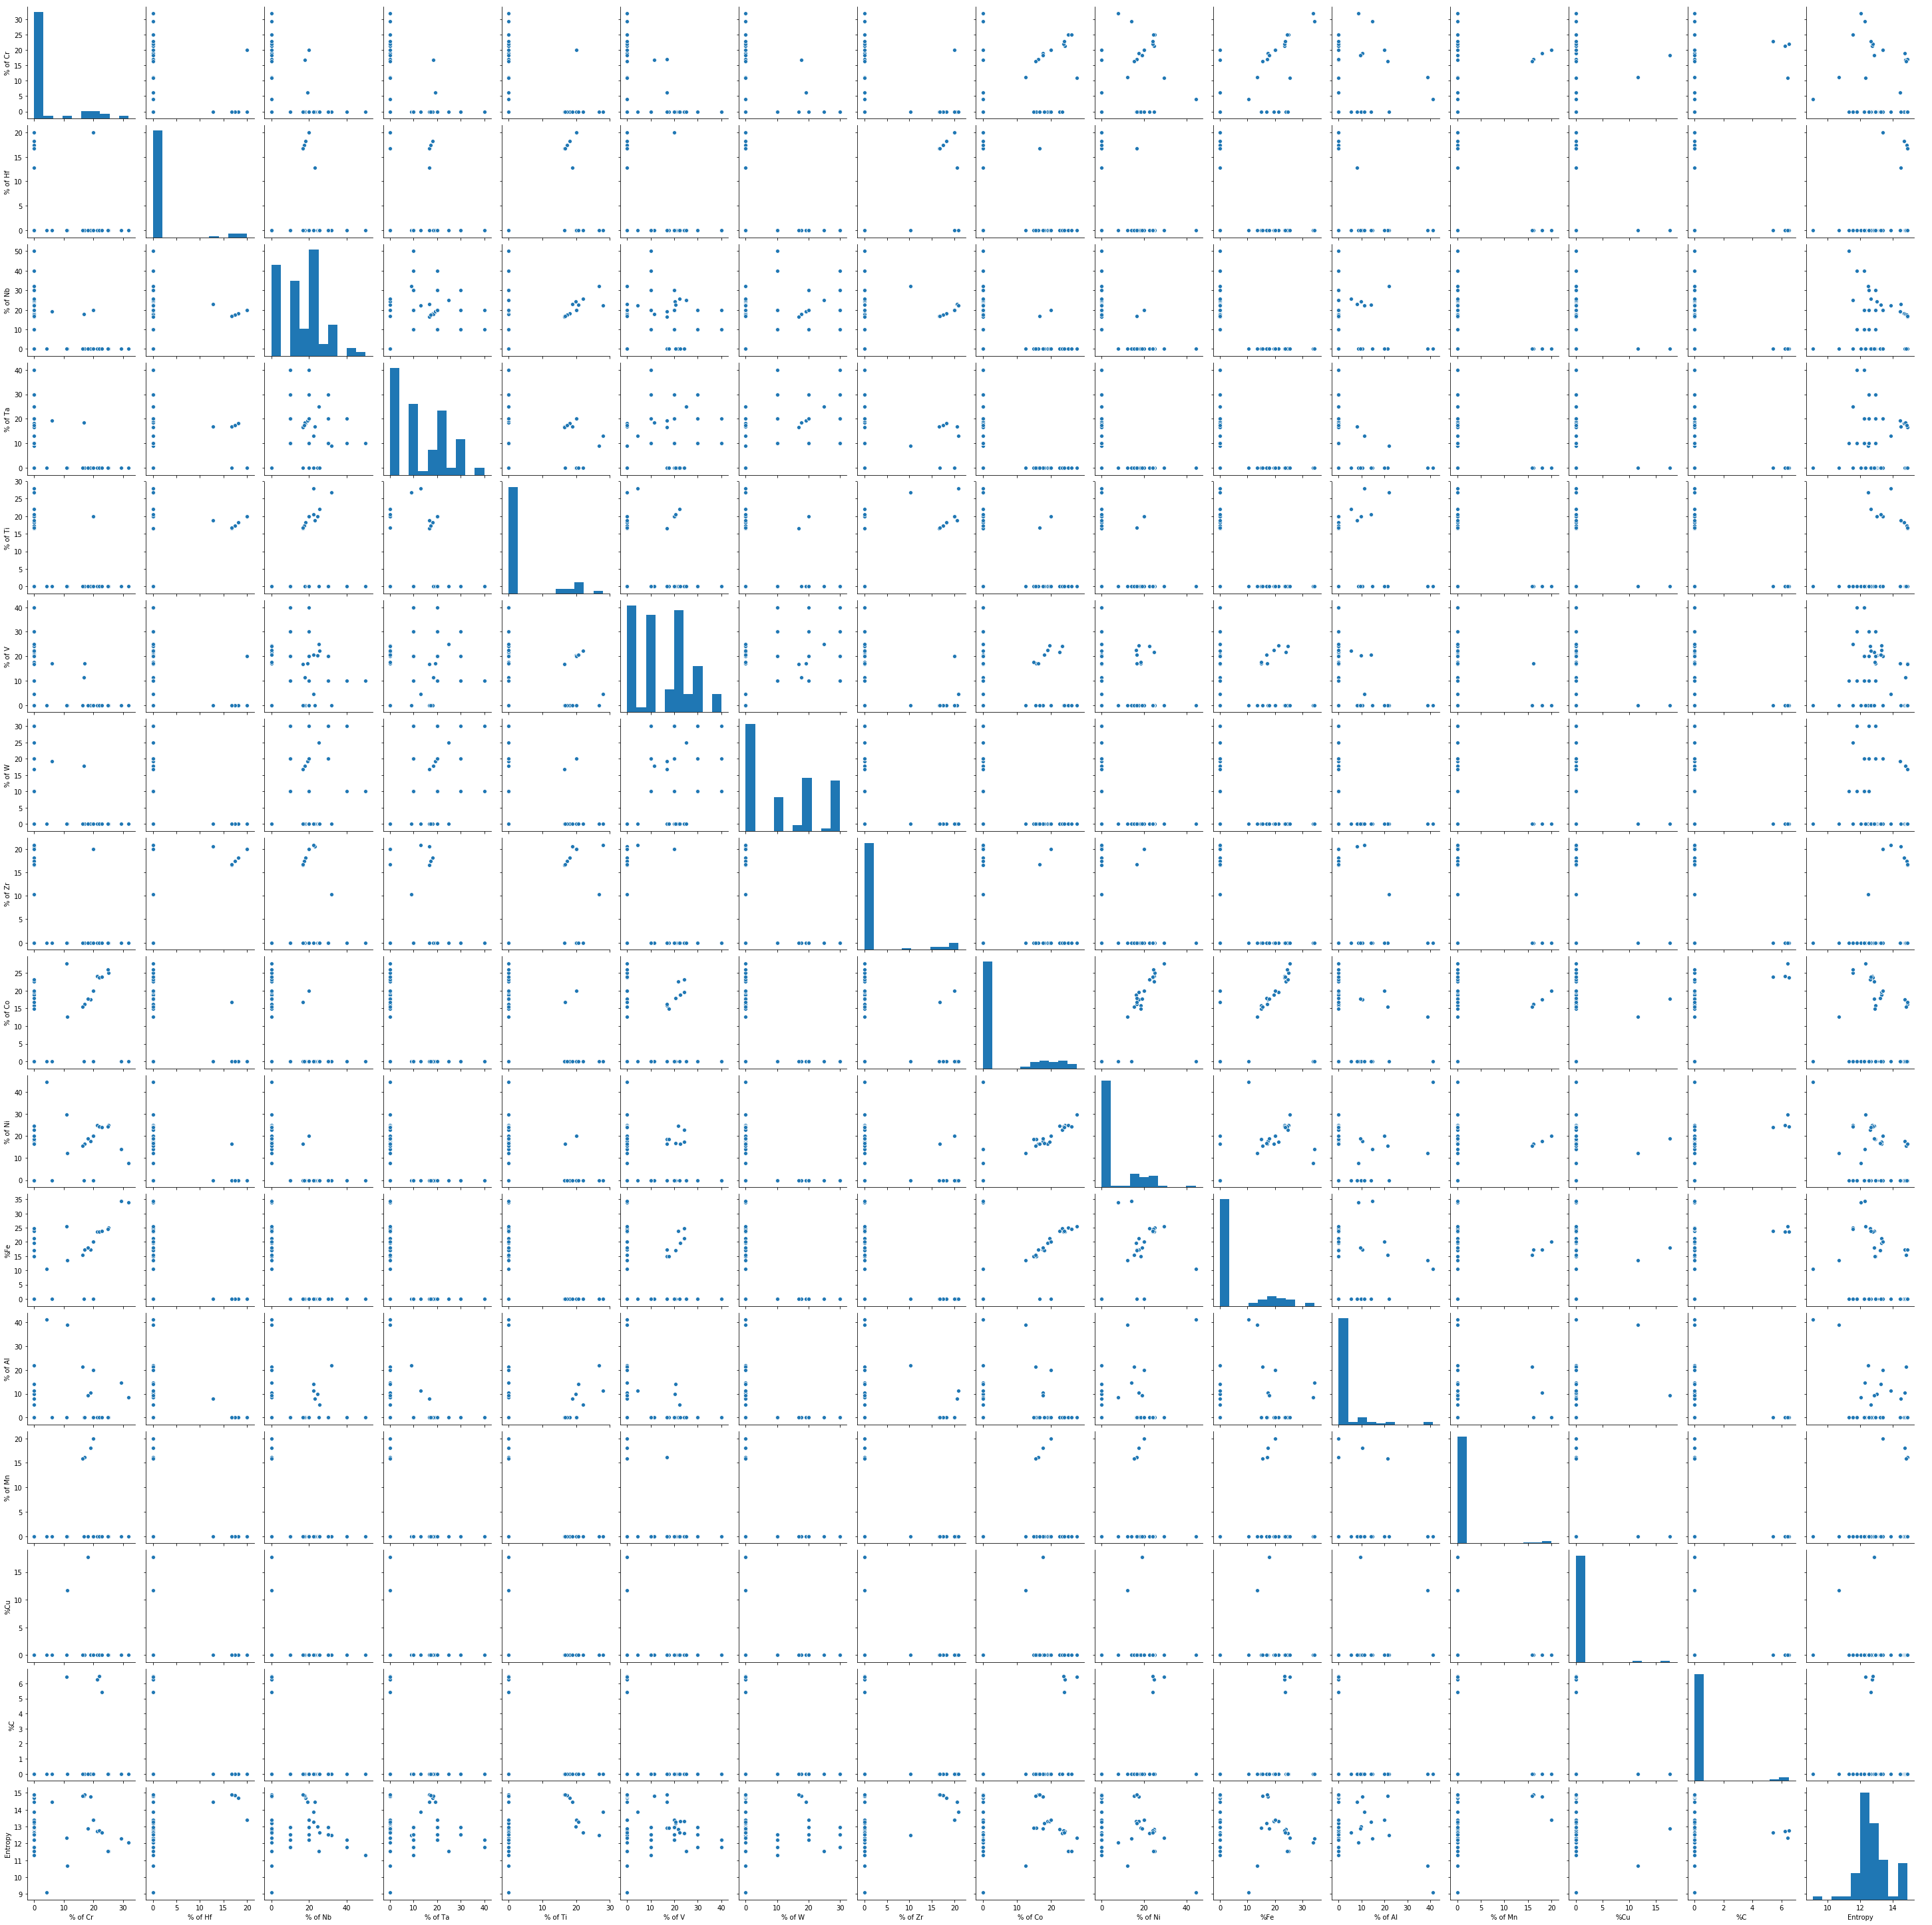

In [52]:
sns.pairplot(features_without_multicollinearity)

From the plots above, it appears that there still is some correlation left among the features numbered 8, 9, and 10.<br>
Let's plot these pairs individually and do further processing.

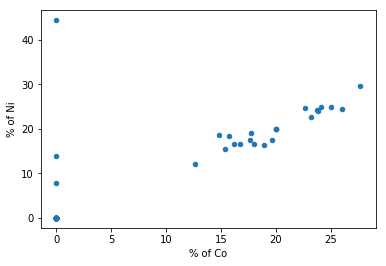

In [59]:
features_without_multicollinearity.plot.scatter(8, 9)

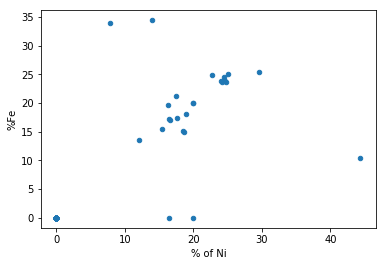

In [60]:
features_without_multicollinearity.plot.scatter(9, 10)

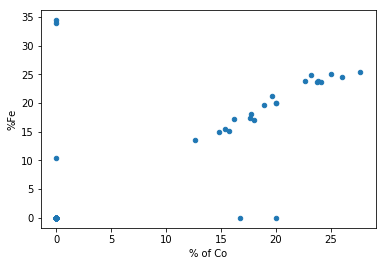

In [61]:
features_without_multicollinearity.plot.scatter(8, 10)

Since the correlation trend appears much stronger for the pairs (8,9) and (8,10) in comparison to (9,10), let's remove the features at positions 8 and 10. The features at those positions are: "% of Co" and "%Fe".

In [63]:
features_to_scale = features_without_multicollinearity[features_without_multicollinearity.columns[~features_without_multicollinearity.columns.isin(["% of Co","%Fe"])]]
features_to_scale.head()

,% of Cr,% of Hf,% of Nb,% of Ta,% of Ti,% of V,% of W,% of Zr,% of Ni,% of Al,% of Mn,%Cu,%C,Entropy
76,0.0,0.0,30.0,10.0,0.0,10.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,12.511562
22,0.0,0.0,24.3,0.0,19.9,20.4,0.0,0.0,0.0,9.8,0.0,0.0,0.0,13.018719
47,0.0,0.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.381672
64,0.0,0.0,20.0,30.0,0.0,10.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,12.946617
105,0.0,0.0,20.0,30.0,0.0,30.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,12.511562


Let's plot the correlation matrix for the remaining features.

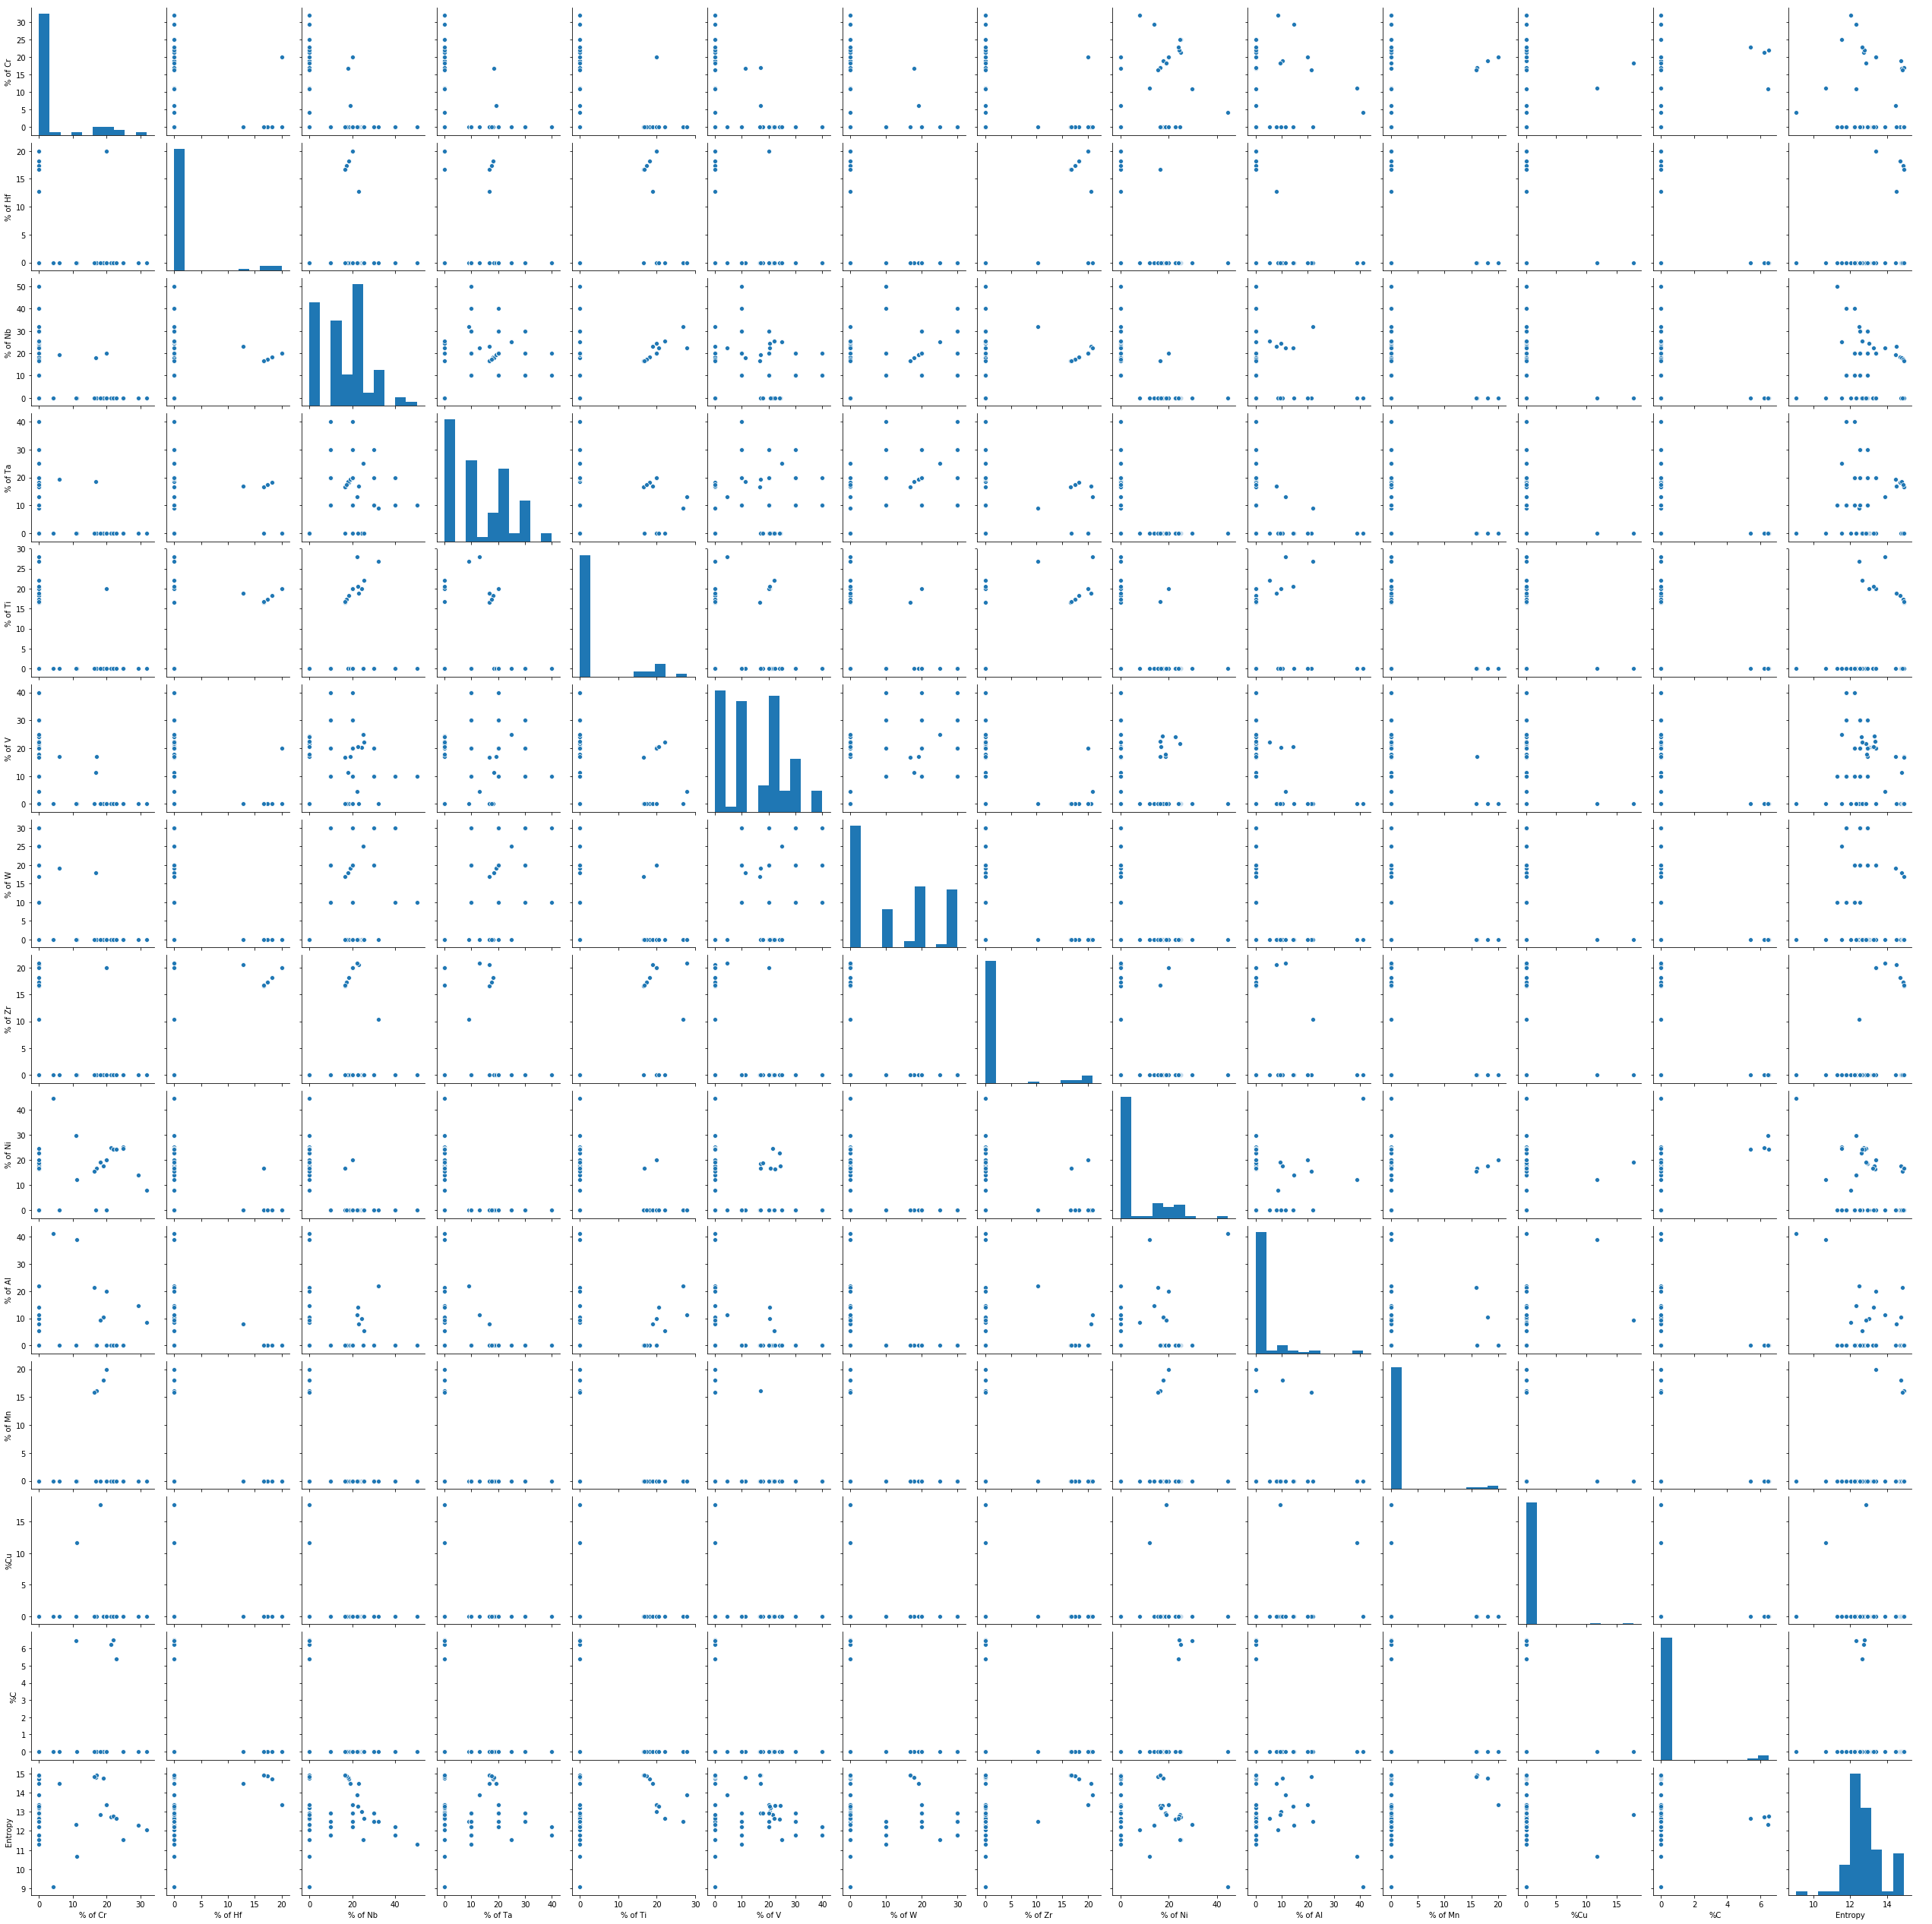

In [64]:
sns.pairplot(features_to_scale)

The scatterplots reveal no obvious correlation among the features anymore.

## Feature Normalization
Update of a weight $\theta_{i}$ corresponding to a feature $j$ is directly proportional to the scale of the feature $j$. Hence, for each feature to give an equal contribution towards gradient update for this weight $\theta_{i}$ , all features should be in an identical/ similar range.<br>

Let's normalize all the features such that the values range between 0 and 1.

In [76]:
minmax_scaler = MinMaxScaler()

#save the column names for later use
cols_in_final_features = features_to_scale.columns

normalized_training_features = pd.DataFrame(minmax_scaler.fit_transform(features_to_scale))

#assign the column names to the normalized data
normalized_training_features.columns = cols_in_final_features

print(f" feature mins : {minmax_scaler.data_min_}, \nfeature maxs: {minmax_scaler.data_max_}")

 feature mins : [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         9.08188057], 
feature maxs: [31.8        20.         50.         40.         27.9        40.
 30.         20.9        44.4        41.1        20.         17.7
  6.5        14.89755083]


In [77]:
normalized_training_features.describe()

,% of Cr,% of Hf,% of Nb,% of Ta,% of Ti,% of V,% of W,% of Zr,% of Ni,% of Al,% of Mn,%Cu,%C,Entropy
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.124661,0.067667,0.291622,0.312667,0.128076,0.363181,0.406963,0.096066,0.127763,0.063477,0.038889,0.018456,0.042017,0.642792
std,0.262257,0.236476,0.224047,0.276801,0.281071,0.284930,0.399400,0.277463,0.222394,0.180972,0.182182,0.125702,0.196443,0.168351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.050000,0.000000,0.000000,0.028125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.553947
50%,0.000000,0.000000,0.341000,0.250000,0.000000,0.352500,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612012
75%,0.000000,0.000000,0.400000,0.500000,0.000000,0.511875,0.666667,0.000000,0.304617,0.000000,0.000000,0.000000,0.000000,0.719137
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
#normalized_training_features.hist(bins = 50, figsize = (20,15))